In [1]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

In [8]:
!git clone https://github.com/Hima0507/project.git

fatal: destination path 'project' already exists and is not an empty directory.


In [9]:
# loading data

df = pd.read_csv('/content/project/Wine Quality/winequality-red.csv') 

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

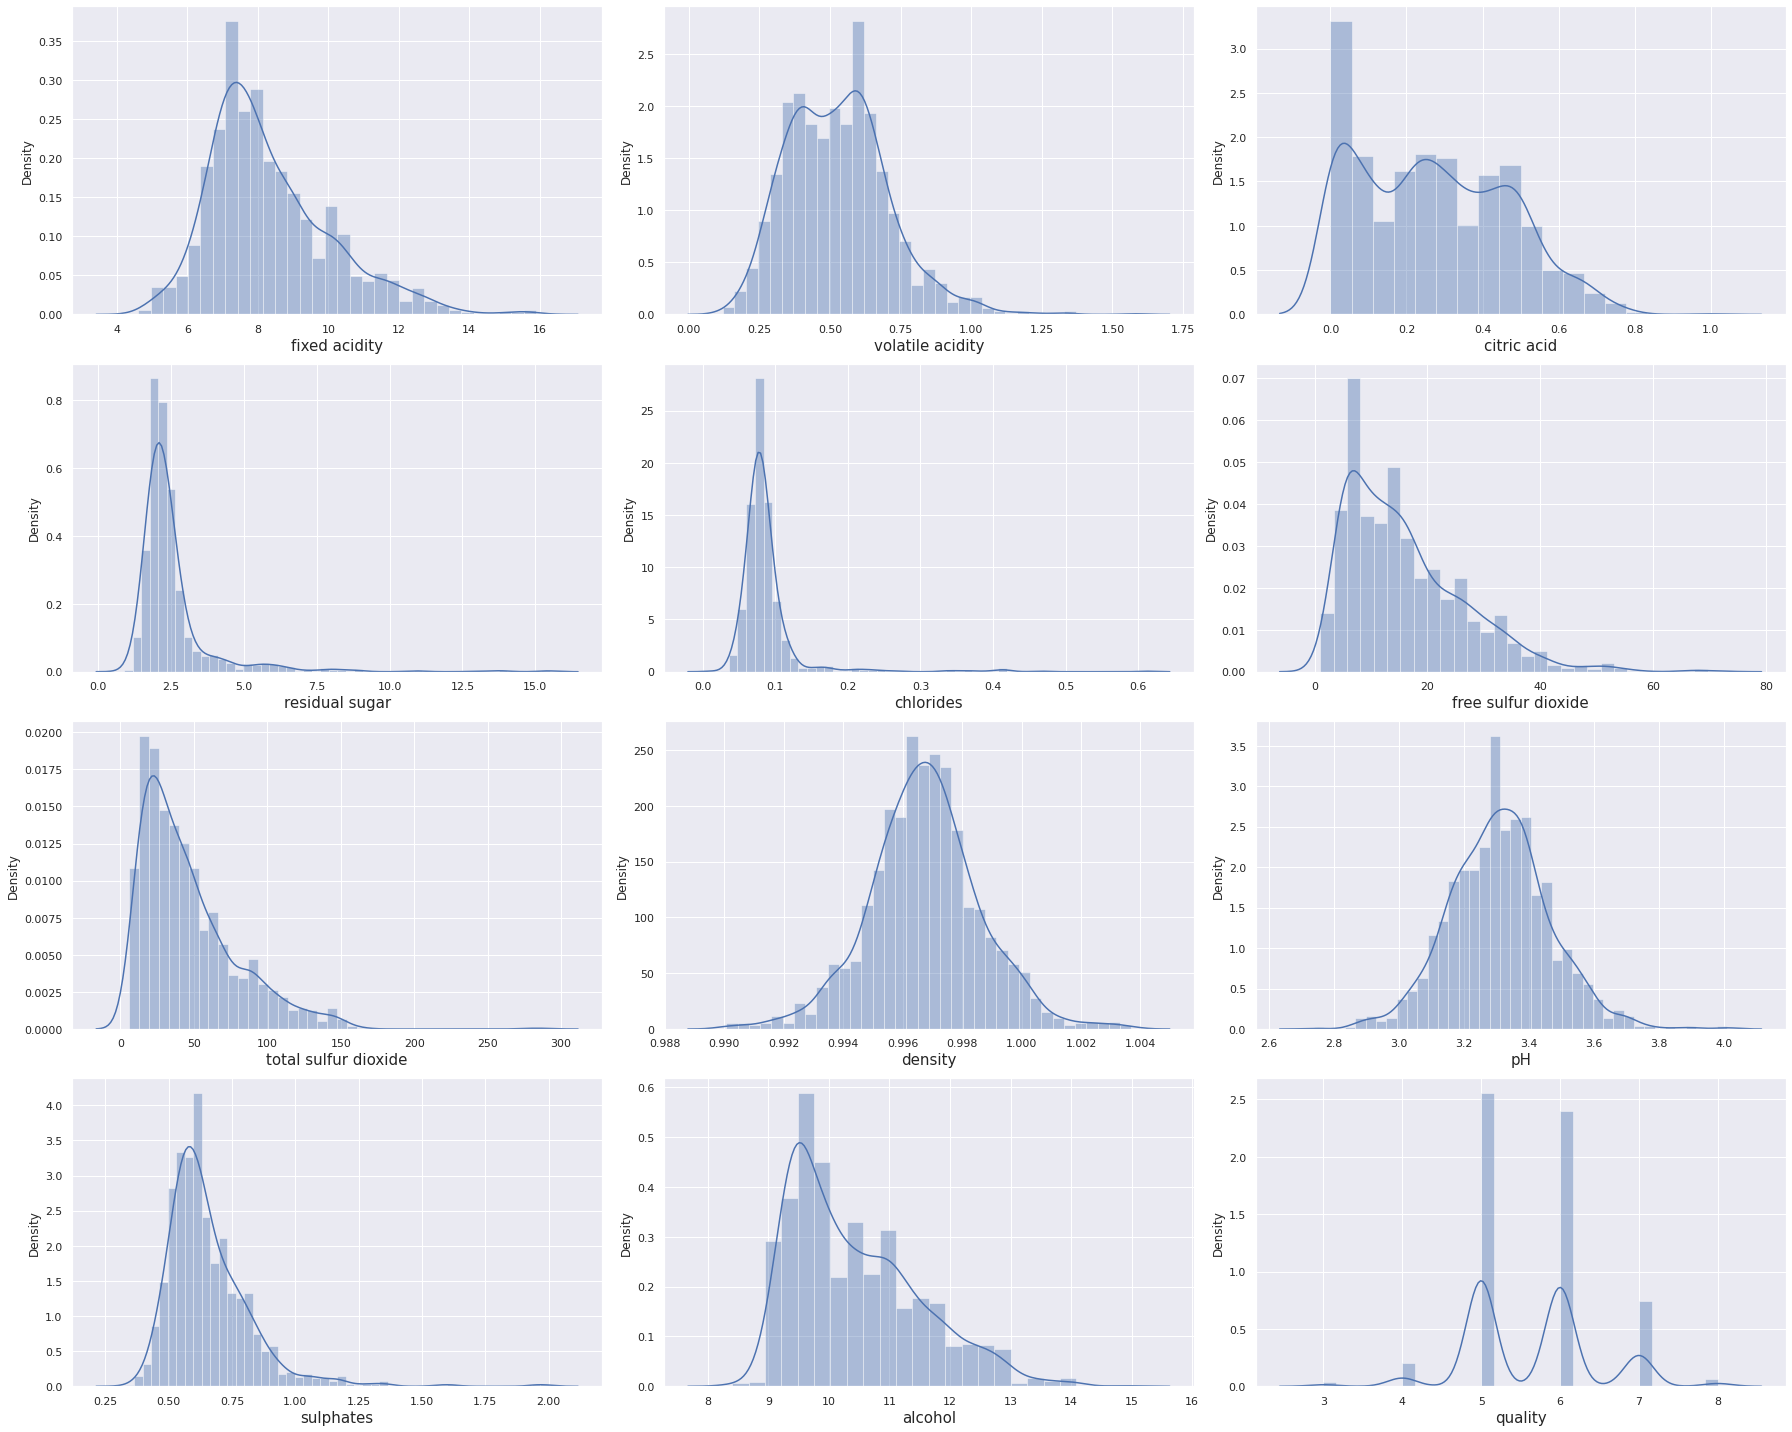

In [13]:
# let's see how data is distributed for every column

plt.figure(figsize = (25, 20))
plotnumber = 1

for col in df:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

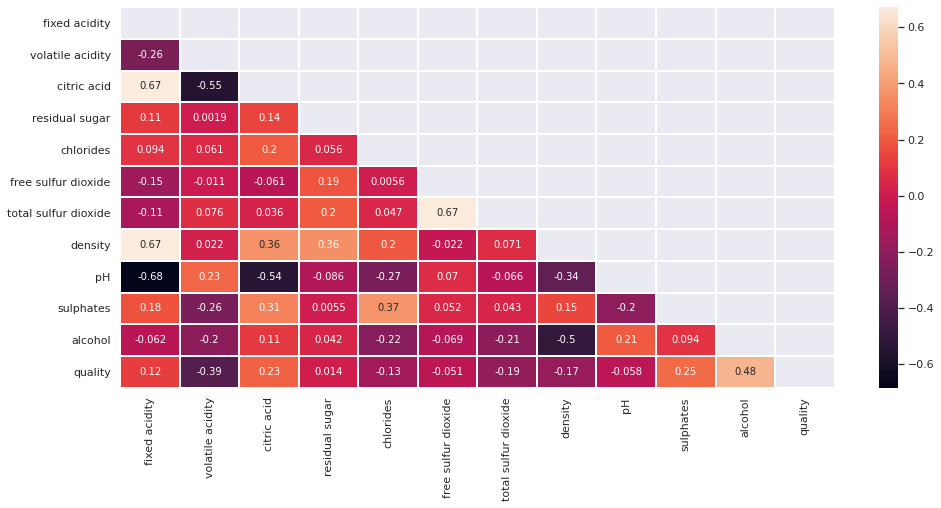

In [14]:
# heatmap

plt.figure(figsize = (16, 7))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, annot = True, fmt = '0.2g', linewidths = 1)
plt.show()

In [15]:
# creating X and y

X = df.drop('quality', axis = 1)
y = df['quality']

In [16]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y)

In [17]:
# scaling data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
# accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr_acc = accuracy_score(y_test, lr.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Accuracy Score of Training Data is {lr_acc}\n")

Accuracy Score of Training Data is 0.6021684737281068
Accuracy Score of Training Data is 0.605



In [20]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [21]:
# accuracy score

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Accuracy Score of Training Data is {knn_acc}\n")

Accuracy Score of Training Data is 0.7105921601334445
Accuracy Score of Training Data is 0.5725



In [22]:
#SVC

from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
# accuracy score

svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, svc.predict(X_train))}")
print(f"Accuracy Score of Training Data is {svc_acc}\n")

Accuracy Score of Training Data is 0.6672226855713094
Accuracy Score of Training Data is 0.64



In [26]:
# SGD Classifier

from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import GridSearchCV

sgd = SGDClassifier()
parameters = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1],
    'loss' : ['hinge', 'log'],
    'penalty' : ['l1', 'l2']
}

grid_search = GridSearchCV(sgd, parameters, cv = 10, n_jobs = -1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'loss': ['hinge', 'log'], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score

In [27]:
# best parameter and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 0.01, 'loss': 'log', 'penalty': 'l2'}
0.5805952380952382


In [28]:
sgd = SGDClassifier(alpha = 0.01, loss = 'log', penalty = 'l2')
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print(accuracy_score(y_train, sgd.predict(X_train)))

sgd_acc = accuracy_score(y_test, sgd.predict(X_test))
print(sgd_acc)

0.5863219349457881
0.6025


In [29]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
# accuracy score

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Accuracy Score of Training Data is {dtc_acc}\n")

Accuracy Score of Training Data is 1.0
Accuracy Score of Training Data is 0.6425



In [31]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
# accuracy score

rf_acc = accuracy_score(y_test, rf.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Accuracy Score of Training Data is {rf_acc}\n")

Accuracy Score of Training Data is 1.0
Accuracy Score of Training Data is 0.695



In [33]:
#ada boost classifier

from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [34]:
# accuracy score

ada_acc = accuracy_score(y_test, ada.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Accuracy Score of Training Data is {ada_acc}\n")

Accuracy Score of Training Data is 1.0
Accuracy Score of Training Data is 0.6225



In [35]:
# hyper parameter tuning using grid search cv

grid_param = {
    'n_estimators' : [40, 50, 70, 80, 100],
    'learning_rate' : [0.01, 0.1, 0.05, 0.5, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    3.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
 

In [36]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 0.05, 'n_estimators': 100}
0.5913354253835426


In [37]:
ada = AdaBoostClassifier(base_estimator = ada, algorithm = 'SAMME.R', learning_rate = 1, n_estimators = 100)
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                     base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                           class_weight=None,
                                                                                           criterion='gini',
                                                                                           max_depth=None,
                                                                                           max_features=None,
                                                                                           max_leaf_nodes=None,
                                                                                           min_impurity_decrease=0.0,
                                                                                           min_impurity_split=None

In [38]:
# accuracy score

ada_acc = accuracy_score(y_test, ada.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Accuracy Score of Training Data is {ada_acc}\n")

Accuracy Score of Training Data is 1.0
Accuracy Score of Training Data is 0.6425



In [39]:
# Gradient Booster Classifier

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [40]:
# accuracy score

gb_acc = accuracy_score(y_test, gb.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Accuracy Score of Training Data is {gb_acc}\n")

Accuracy Score of Training Data is 0.9074228523769808
Accuracy Score of Training Data is 0.675



In [41]:
# Stocastic Gradient Boosting

sgb = GradientBoostingClassifier(subsample = 0.9, max_features = 0.8)
sgb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=0.8, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [42]:
# accuracy score

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Accuracy Score of Training Data is {sgb_acc}\n")

Accuracy Score of Training Data is 0.9165971643035863
Accuracy Score of Training Data is 0.6525



In [43]:
# Xgboost

from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate = 0.1, loss = 'deviance', n_estimators = 100)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, loss='deviance', max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [44]:
# accuracy score

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Accuracy Score of Training Data is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Accuracy Score of Training Data is {xgb_acc}\n")

Accuracy Score of Training Data is 0.8215179316096747
Accuracy Score of Training Data is 0.665



In [45]:
#Light Gradient Boosting Classifier

from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {lgbm_acc} \n")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.6775 



In [48]:
#Extra Trees Classifier

from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [49]:
etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {etc_acc} \n")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.6825 



In [50]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'SVC', 'SGD',  'Decision Tree', 'Random Forest','Ada Boost',
             'Gradient Boosting', 'SGB', 'XgBoost', 'LGBM', 'Extra Tree'],
    'Score' : [lr_acc, knn_acc, svc_acc, sgd_acc, dtc_acc, rf_acc, ada_acc, gb_acc, sgb_acc, xgb_acc, lgbm_acc, etc_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
5,Random Forest,0.6950
11,Extra Tree,0.6825
10,LGBM,0.6775
7,Gradient Boosting,0.6750
9,XgBoost,0.6650
8,SGB,0.6525
4,Decision Tree,0.6425
6,Ada Boost,0.6425
2,SVC,0.6400
0,Logistic Regression,0.6050


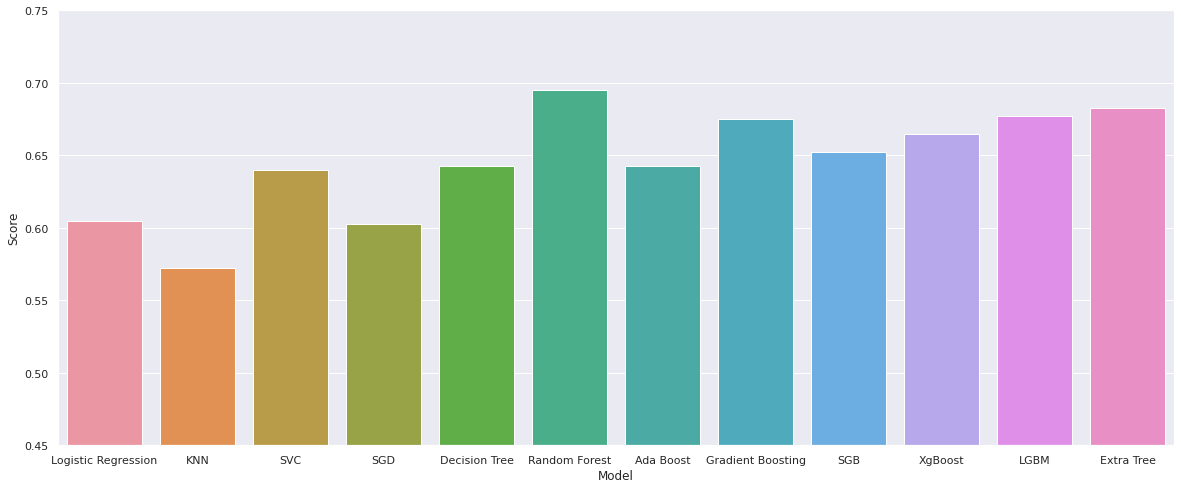

In [51]:
plt.figure(figsize = (20, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.ylim(0.45, 0.75)
plt.show()